# Lesson 15: Using Databases and SQL 

Databases give us very fast random access to large amounts of data. There is a lot of material in this chapter as we learn the Structured Query Language (SQL).

### [Video: Databases - Part 1](<https://www.youtube.com/watch?v=3RMPveOMd0k>)

## What is a Database? 

A *database* is a file that is organized for storing data. Most databases are organized like a dictionary in the sense that they map from keys to values. The biggest difference is that the database is on disk (or other permanent storage), so it persists after the program ends. Because a database is stored on permanent storage, it can store far more data than a dictionary, which is limited to the size of the memory in the computer.

Like a dictionary, database software is designed to keep the inserting and accessing of data very fast, even for large amounts of data. Database software maintains its performance by building indexes as data is added to the database to allow the computer to jump quickly to a particular entry.

There are many different database systems which are used for a wide variety of purposes including: Oracle, MySQL, Microsoft SQL Server, PostgreSQL, and SQLite. We focus on SQLite in this book because it is a very common database and is already built into Python. SQLite is designed to be *embedded* into other applications to provide database support within the application. For example, the Firefox browser also uses the SQLite database internally as do many other products.

<http://sqlite.org/>

SQLite is well suited to some of the data manipulation problems that we see in Informatics such as the Twitter spidering application that we describe in this chapter.

## Database Concepts

When you first look at a database it looks like a spreadsheet with multiple sheets. The primary data structures in a database are: *tables*, *rows*, and *columns*.

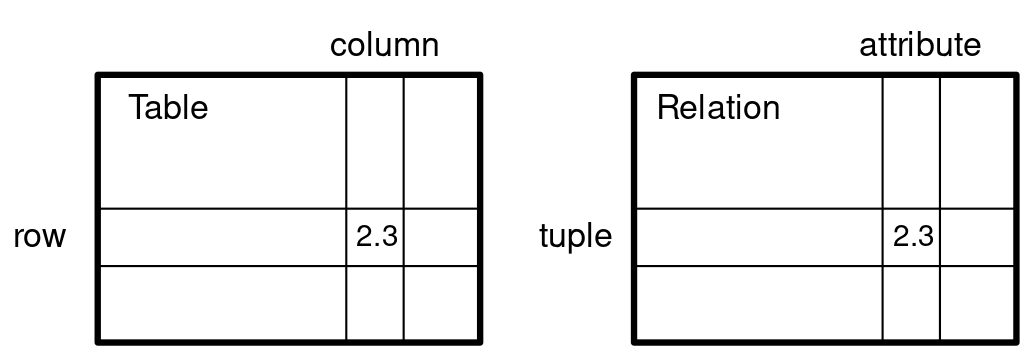
Relational Databases

In technical descriptions of relational databases the concepts of table, row, and column are more formally referred to as *relation*, *tuple*, and *attribute*, respectively. We will use the less formal terms in this chapter.

## Database Browser for SQLite

While this chapter will focus on using Python to work with data in SQLite database files, many operations can be done more conveniently using software called the *Database Browser* for SQLite which is freely available from:

<http://sqlitebrowser.org/>

Using the browser you can easily create tables, insert data, edit data, or run simple SQL queries on the data in the database.

In a sense, the database browser is similar to a text editor when working with text files. When you want to do one or very few operations on a text file, you can just open it in a text editor and make the changes you want. When you have many changes that you need to do to a text file, often you will write a simple Python program. You will find the same pattern when working with databases. You will do simple operations in the database manager and more complex operations will be most conveniently done in Python.

## Creating a Database Table

### [Video: Databases - Single Table SQL - Part 2](<https://www.youtube.com/watch?v=yRJE-nk20sM>)

Databases require more defined structure than Python lists or dictionaries^[SQLite actually does allow some flexibility in the type of data stored in a column, but we will keep our data types strict in this chapter so the concepts apply equally to other database systems such as MySQL.].

When we create a database *table* we must tell the database in advance the names of each of the *columns* in the table and the type of data which we are planning to store in each *column*. When the database software knows the type of data in each column, it can choose the most efficient way to store and look up the data based on the type of data.

You can look at the various data types supported by SQLite at the following url:

<http://www.sqlite.org/datatypes.html>

Defining structure for your data up front may seem inconvenient at the beginning, but the payoff is fast access to your data even when the database contains a large amount of data.

The code to create a database file and a table named `Tracks` with two columns in the database is as follows:

In [2]:
import sqlite3

conn = sqlite3.connect('music.sqlite')
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS Tracks')
cur.execute('CREATE TABLE Tracks (title TEXT, plays INTEGER)')

conn.close()

# Code: http://www.py4e.com/code3/db1.py


The `connect` operation makes a "connection" to the database stored in the file `music.sqlite` in the current directory. If the file does not exist, it will be created. The reason this is called a "connection" is that sometimes the database is stored on a separate "database server" from the server on which we are running our application. In our simple examples the database will just be a local file in the same directory as the Python code we are running.

A cursor is like a file handle that we can use to perform operations on the data stored in the database. Calling `cursor()` is very similar conceptually to calling `open()` when dealing with text files.

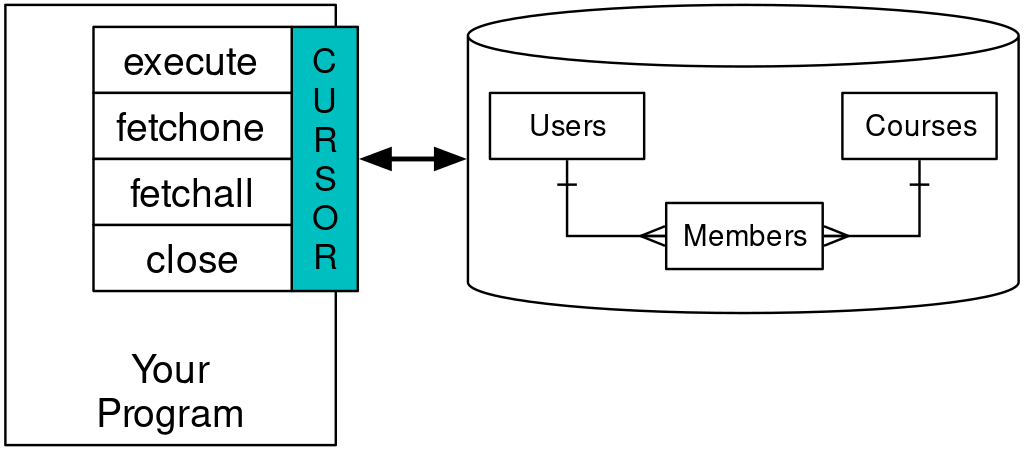
A Database Cursor

Once we have the cursor, we can begin to execute commands on the contents of the database using the `execute()` method.

Database commands are expressed in a special language that has been standardized across many different database vendors to allow us to learn a single database language. The database language is called *Structured Query Language* or SQL for short.

<http://en.wikipedia.org/wiki/SQL>

In our example, we are executing two SQL commands in our database. As a convention, we will show the SQL keywords in uppercase and the parts of the command that we are adding (such as the table and column names) will be shown in lowercase.

The first SQL command removes the `Tracks` table from the database if it exists. This pattern is simply to allow us to run the same program to create the `Tracks` table over and over again without causing an error. Note that the `DROP TABLE` command deletes the table and all of its contents from the database (i.e., there is no "undo").

```py
cur.execute('DROP TABLE IF EXISTS Tracks ')
```

The second command creates a table named `Tracks` with a text column named `title` and an integer column named `plays`.

```py
cur.execute('CREATE TABLE Tracks (title TEXT, plays INTEGER)')
```

Now that we have created a table named `Tracks`, we can put some data into that table using the SQL `INSERT` operation. Again, we begin by making a connection to the database and obtaining the `cursor`. We can then execute SQL commands using the cursor.

The SQL `INSERT` command indicates which table we are using and then defines a new row by listing the fields we want to include (`title`, `plays`) followed by the `VALUES` we want placed in the new row. We specify the values as question marks (`?, ?`) to indicate that the actual values are passed in as a tuple (` 'My Way', 15 `) as the second parameter to the `execute()` call.



In [3]:
import sqlite3

conn = sqlite3.connect('music.sqlite')
cur = conn.cursor()

cur.execute('INSERT INTO Tracks (title, plays) VALUES (?, ?)',
    ('Thunderstruck', 20))
cur.execute('INSERT INTO Tracks (title, plays) VALUES (?, ?)',
    ('My Way', 15))
conn.commit()

print('Tracks:')
cur.execute('SELECT title, plays FROM Tracks')
for row in cur:
     print(row)

cur.execute('DELETE FROM Tracks WHERE plays < 100')
conn.commit()

cur.close()

# Code: http://www.py4e.com/code3/db2.py


Tracks:
('Thunderstruck', 20)
('My Way', 15)


First we `INSERT` two rows into our table and use `commit()` to force the data to be written to the database file.

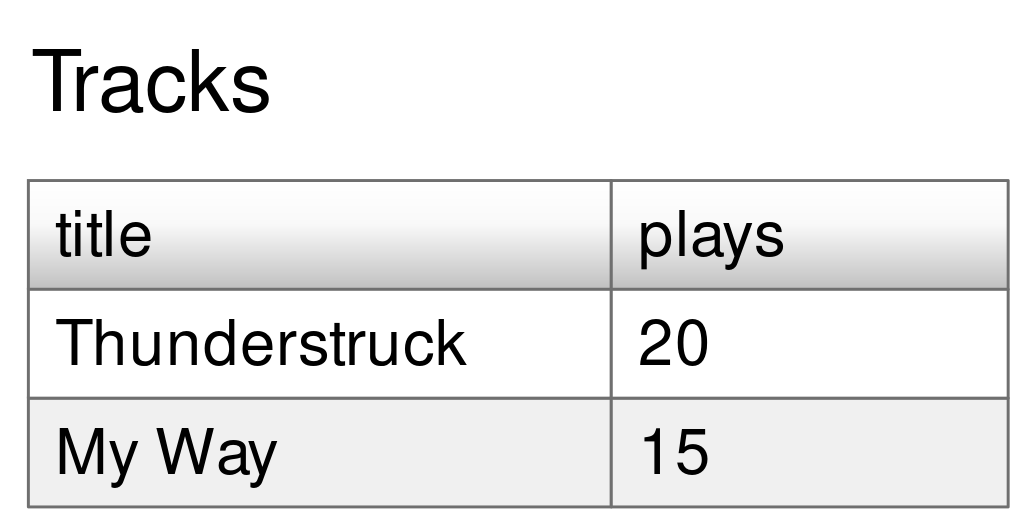
Rows in a Table

Then we use the `SELECT` command to retrieve the rows we just inserted from the table. On the `SELECT` command, we indicate which columns we would like (`title, plays`) and indicate which table we want to retrieve the data from. After we execute the `SELECT` statement, the cursor is something we can loop through in a `for` statement. For efficiency, the cursor does not read all of the data from the database when we execute the `SELECT` statement. Instead, the data is read on demand as we loop through the rows in the `for` statement.

The output of the program is as follows:

    Tracks:
    ('Thunderstruck', 20)
    ('My Way', 15)

Our `for` loop finds two rows, and each row is a Python tuple with the first value as the `title` and the second value as the number of `plays`.

Note: You may see strings starting with `u'` in other books or on the Internet. *This was an indication in Python 2 that the strings are **Unicode** strings that are capable of storing non-Latin character sets. In Python 3, all strings are unicode strings by default*.

At the very end of the program, we execute an SQL command to `DELETE` the rows we have just created so we can run the program over and over. The `DELETE` command shows the use of a `WHERE` clause that allows us to express a selection criterion so that we can ask the database to apply the command to only the rows that match the criterion. In this example the criterion happens to apply to all the rows so we empty the table out so we can run the program repeatedly. After the `DELETE` is performed, we also call `commit()` to force the data to be removed from the database.

## Structured Query Language Summary

### [Video: Worked Example: Emaildb.py](<https://www.youtube.com/watch?v=MsZoGw4QEpU>)

So far, we have been using the Structured Query Language in our Python examples and have covered many of the basics of the SQL commands. In this section, we look at the SQL language in particular and give an overview of SQL syntax.

Since there are so many different database vendors, the Structured Query Language (SQL) was standardized so we could communicate in a portable manner to database systems from multiple vendors.

A relational database is made up of tables, rows, and columns. The columns generally have a type such as text, numeric, or date data. When we create a table, we indicate the names and types of the columns:

    CREATE TABLE Tracks (title TEXT, plays INTEGER)

To insert a row into a table, we use the SQL `INSERT` command:

    INSERT INTO Tracks (title, plays) VALUES ('My Way', 15)

The `INSERT` statement specifies the table name, then a list of the fields/columns that you would like to set in the new row, and then the keyword `VALUES` and a list of corresponding values for each of the fields.

The SQL `SELECT` command is used to retrieve rows and columns from a database. The `SELECT` statement lets you specify which columns you would like to retrieve as well as a `WHERE` clause to select which rows you would like to see. It also allows an optional `ORDER BY` clause to control the sorting of the returned rows.

    SELECT * FROM Tracks WHERE title = 'My Way'

Using `*` indicates that you want the database to return all of the columns for each row that matches the `WHERE` clause.

Note, unlike in Python, in a SQL `WHERE` clause we use a single equal sign to indicate a test for equality rather than a double equal sign. Other logical operations allowed in a `WHERE` clause include `<,` `>`, `<=`, `>=`, `!=`, as well as `AND` and `OR` and parentheses to build your logical expressions.

You can request that the returned rows be sorted by one of the fields as follows:

    SELECT title,plays FROM Tracks ORDER BY title

To remove a row, you need a `WHERE` clause on an SQL `DELETE` statement. The `WHERE` clause determines which rows are to be deleted:

    DELETE FROM Tracks WHERE title = 'My Way'

It is possible to `UPDATE` a column or columns within one or more rows in a table using the SQL `UPDATE` statement as follows:

    UPDATE Tracks SET plays = 16 WHERE title = 'My Way'

The `UPDATE` statement specifies a table and then a list of fields and values to change after the `SET` keyword and then an optional `WHERE` clause to select the rows that are to be updated. A single `UPDATE` statement will change all of the rows that match the `WHERE` clause. If a `WHERE` clause is not specified, it performs the UPDATE on all of the rows in the table.

These four basic SQL commands (INSERT, SELECT, UPDATE, and DELETE) allow the four basic operations needed to create and maintain data.

In [5]:
import sqlite3

conn = sqlite3.connect('emaildb.sqlite')
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS Counts')

cur.execute('''
CREATE TABLE Counts (email TEXT, count INTEGER)''')

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    cur.execute('SELECT count FROM Counts WHERE email = ? ', (email,))
    row = cur.fetchone()
    if row is None:
        cur.execute('''INSERT INTO Counts (email, count)
                VALUES (?, 1)''', (email,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?',
                    (email,))
    conn.commit()

# https://www.sqlite.org/lang_select.html
sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close() 

Enter file name: mbox-short.txt
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
antranig@caret.cam.ac.uk 1
gopal.ramasammycook@gmail.com 1


## Basic Data Modeling

[Video: Databases - Complex Models - Part 3](<https://www.youtube.com/watch?v=rHjRpYUl5eg>)

The real power of a relational database is when we create multiple tables and make links between those tables. The act of deciding how to break up your application data into multiple tables and establishing the relationships between the tables is called *data modeling*. The design document that shows the tables and their relationships is called a *data model*.

Data modeling is a relatively sophisticated skill and we will only introduce the most basic concepts of relational data modeling in this section. For more detail on data modeling you can start with:

<http://en.wikipedia.org/wiki/Relational_model>

Let's say for our Twitter spider application, instead of just counting a person's friends, we wanted to keep a list of all of the incoming relationships so we could find a list of everyone who is following a particular account.

Since everyone will potentially have many accounts that follow them, we cannot simply add a single column to our `Twitter` table. So we create a new table that keeps track of pairs of friends. The following is a simple way of making such a table:

    CREATE TABLE Pals (from_friend TEXT, to_friend TEXT)

Each time we encounter a person who `drchuck` is following, we would insert a row of the form:

    INSERT INTO Pals (from_friend,to_friend) VALUES ('drchuck', 'lhawthorn')

As we are processing the 20 friends from the `drchuck` Twitter feed, we will insert 20 records with "drchuck" as the first parameter so we will end up duplicating the string many times in the database.

This duplication of string data violates one of the best practices for *database normalization* which basically states that we should never put the same string data in the database more than once. If we need the data more than once, we create a numeric key for the data and reference the actual data using this key.

In practical terms, a string takes up a lot more space than an integer on the disk and in the memory of our computer, and takes more processor time to compare and sort. If we only have a few hundred entries, the storage and processor time hardly matters. But if we have a million people in our database and a possibility of 100 million friend links, it is important to be able to scan data as quickly as possible.

We will store our Twitter accounts in a table named `People` instead of the `Twitter` table used in the previous example. The `People` table has an additional column to store the numeric key associated with the row for this Twitter user. SQLite has a feature that automatically adds the key value for any row we insert into a table using a special type of data column (`INTEGER PRIMARY KEY`).

We can create the `People` table with this additional id column as follows:

    CREATE TABLE People
    (id INTEGER PRIMARY KEY, name TEXT UNIQUE, retrieved INTEGER)

Notice that we are no longer maintaining a friend count in each row of the `People` table. When we select `INTEGER PRIMARY KEY` as the type of our id column, we are indicating that we would like SQLite to manage this column and assign a unique numeric key to each row we insert automatically. We also add the keyword `UNIQUE` to indicate that we will not allow SQLite to insert two rows with the same value for `name`.

Now instead of creating the table `Pals` above, we create a table called `Follows` with two integer columns `from_id` and `to_id` and a constraint on the table that the combination of `from_id` and `to_id` must be unique in this table (i.e., we cannot insert duplicate rows) in our database.

    CREATE TABLE Follows
    (from_id INTEGER, to_id INTEGER, UNIQUE(from_id, to_id) )

When we add `UNIQUE` clauses to our tables, we are communicating a set of rules that we are asking the database to enforce when we attempt to insert records. We are creating these rules as a convenience in our programs, as we will see in a moment. The rules both keep us from making mistakes and make it simpler to write some of our code.

In essence, in creating this `Follows` table, we are modelling a "relationship" where one person "follows" someone else and representing it with a pair of numbers indicating that (a) the people are connected and (b) the direction of the relationship.

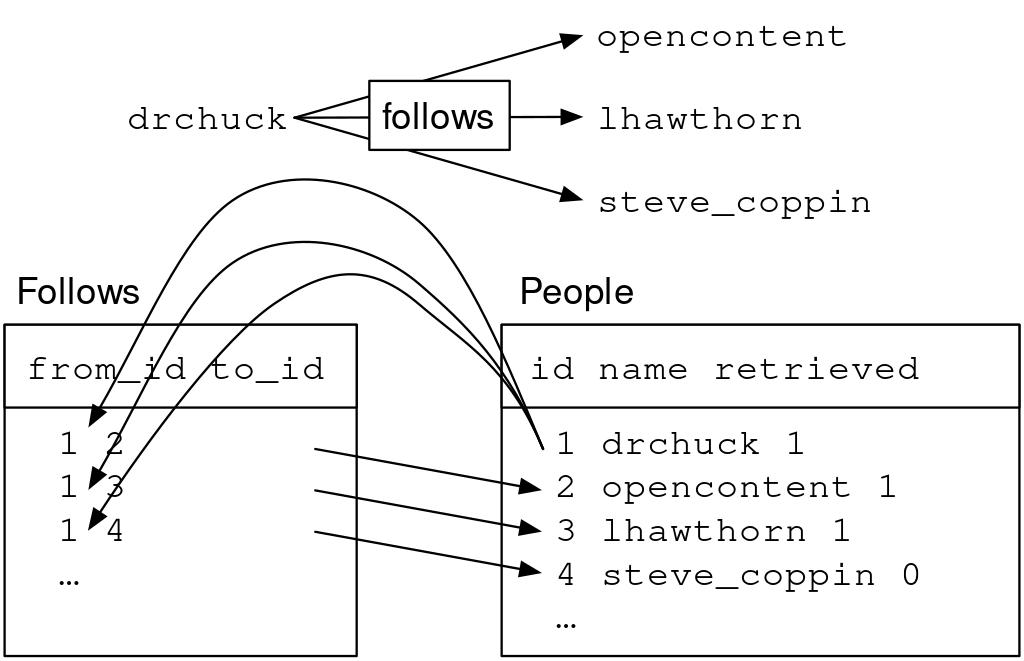
Relationships Between Tables


## Programming with Multiple Tables

### [Video: Databases - Part 4](<https://www.youtube.com/watch?v=PgE--P-ZWvU>)

We will now redo the Twitter spider program using two tables, the primary keys, and the key references as described above. Here is the code for the new version of the program:

In [5]:
import urllib.request, urllib.parse, urllib.error
import twurl
import json
import sqlite3
import ssl

TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

conn = sqlite3.connect('friends.sqlite')
cur = conn.cursor()

cur.execute('''CREATE TABLE IF NOT EXISTS People
    (id INTEGER PRIMARY KEY, name TEXT UNIQUE, retrieved INTEGER)''')
cur.execute('''CREATE TABLE IF NOT EXISTS Follows
    (from_id INTEGER, to_id INTEGER, UNIQUE(from_id, to_id))''')

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    acct = input('Enter a Twitter account, or quit: ')
    if (acct == 'quit'): break
    if (len(acct) < 1):
        cur.execute(
           'SELECT id, name FROM People WHERE retrieved=0 LIMIT 1'
        )
        try:
            (id, acct) = cur.fetchone()
        except:
            print('No unretrieved Twitter accounts found')
            continue
    else:
        cur.execute('SELECT id FROM People WHERE name = ? LIMIT 1',
                    (acct, ))
        try:
            id = cur.fetchone()[0]
        except:
            cur.execute('''INSERT OR IGNORE INTO People
                        (name, retrieved) VALUES (?, 0)''', (acct, ))
            conn.commit()
            if cur.rowcount != 1:
                print('Error inserting account:', acct)
                continue
            id = cur.lastrowid

    url = twurl.augment(TWITTER_URL,
        {'screen_name': acct, 'count': '100'})
    print('Retrieving account', acct)
    try:
        connection = urllib.request.urlopen(url, context=ctx)
    except Exception as err:
        print('Failed to Retrieve', err)
        break

    data = connection.read().decode()
    headers = dict(connection.getheaders())

    print('Remaining', headers['x-rate-limit-remaining'])

    try:
        js = json.loads(data)
    except:
        print('Unable to parse json')
        print(data)
        break

    # Debugging
    # print(json.dumps(js, indent=4))

    if 'users' not in js:
        print('Incorrect JSON received')
        print(json.dumps(js, indent=4))
        continue

    cur.execute('UPDATE People SET retrieved=1 WHERE name = ?', (acct, ))

    countnew = 0
    countold = 0
    for u in js['users']:
        friend = u['screen_name']
        print(friend)
        cur.execute('SELECT id FROM People WHERE name = ? LIMIT 1',
                    (friend, ))
        try:
            friend_id = cur.fetchone()[0]
            countold = countold + 1
        except:
            cur.execute('''INSERT OR IGNORE INTO People (name, retrieved)
                        VALUES (?, 0)''', (friend, ))
            conn.commit()
            if cur.rowcount != 1:
                print('Error inserting account:', friend)
                continue
            friend_id = cur.lastrowid
            countnew = countnew + 1
        cur.execute('''INSERT OR IGNORE INTO Follows (from_id, to_id)
                    VALUES (?, ?)''', (id, friend_id))
    print('New accounts=', countnew, ' revisited=', countold)
    print('Remaining', headers['x-rate-limit-remaining'])
    conn.commit()
cur.close()

# Code: http://www.py4e.com/code3/twfriends.py


ModuleNotFoundError: No module named 'twurl'

This program is starting to get a bit complicated, but it illustrates the patterns that we need to use when we are using integer keys to link tables. The basic patterns are:

1. Create tables with primary keys and constraints.

2. When we have a logical key for a person (i.e., account name) and we need the `id` value for the person, depending on whether or not the person is already in the `People` table we either need to: (1) look up the person in the `People` table and retrieve the `id` value for the person or (2) add the person to the `People` table and get the `id` value for the newly added row.

3. Insert the row that captures the "follows" relationship.

We will cover each of these in turn.

## Constraints in Database Tables

As we design our table structures, we can tell the database system that we would like it to enforce a few rules on us. These rules help us from making mistakes and introducing incorrect data into our tables. When we create our tables:

```
cur.execute('''CREATE TABLE IF NOT EXISTS People
    (id INTEGER PRIMARY KEY, name TEXT UNIQUE, retrieved INTEGER)''')
cur.execute('''CREATE TABLE IF NOT EXISTS Follows
    (from_id INTEGER, to_id INTEGER, UNIQUE(from_id, to_id))''')
```

We indicate that the `name` column in the `People` table must be `UNIQUE`. We also indicate that the combination of the two numbers in each row of the `Follows` table must be unique. These constraints keep us from making mistakes such as adding the same relationship more than once.

We can take advantage of these constraints in the following code:

```
cur.execute('''INSERT OR IGNORE INTO People (name, retrieved)
    VALUES ( ?, 0)''', ( friend, ) )
```

We add the `OR IGNORE` clause to our `INSERT` statement to indicate that if this particular `INSERT` would cause a violation of the "`name` must be unique" rule, the database system is allowed to ignore the `INSERT`. We are using the database constraint as a safety net to make sure we don't inadvertently do something incorrect.

Similarly, the following code ensures that we don't add the exact same `Follows` relationship twice.

```
cur.execute('''INSERT OR IGNORE INTO Follows
    (from_id, to_id) VALUES (?, ?)''', (id, friend_id) )
```

Again, we simply tell the database to ignore our attempted `INSERT` if it would violate the uniqueness constraint that we specified for the `Follows` rows.

## Retrieve and/or Insert a Record

When we prompt the user for a Twitter account, if the account exists, we must look up its `id` value. If the account does not yet exist in the `People` table, we must insert the record and get the `id` value from the inserted row.

This is a very common pattern and is done twice in the program above. This code shows how we look up the `id` for a friend's account when we have extracted a `screen_name` from a `user` node in the retrieved Twitter JSON.

Since over time it will be increasingly likely that the account will already be in the database, we first check to see if the `People` record exists using a `SELECT` statement.

If all goes well^[In general, when a sentence starts with "if all goes well" you will find that the code needs to use try/except.] inside the `try` section, we retrieve the record using `fetchone()` and then retrieve the first (and only) element of the returned tuple and store it in `friend_id`.

If the `SELECT` fails, the `fetchone()[0]` code will fail and control will transfer into the `except` section.

```py
    friend = u['screen_name']
    cur.execute('SELECT id FROM People WHERE name = ? LIMIT 1',
        (friend, ) )
    try:
        friend_id = cur.fetchone()[0]
        countold = countold + 1
    except:
        cur.execute('''INSERT OR IGNORE INTO People (name, retrieved)
            VALUES ( ?, 0)''', ( friend, ) )
        conn.commit()
        if cur.rowcount != 1 :
            print('Error inserting account:',friend)
            continue
        friend_id = cur.lastrowid
        countnew = countnew + 1
```

If we end up in the `except` code, it simply means that the row was not found, so we must insert the row. We use `INSERT OR IGNORE` just to avoid errors and then call `commit()` to force the database to really be updated. After the write is done, we can check the `cur.rowcount` to see how many rows were affected. Since we are attempting to insert a single row, if the number of affected rows is something other than 1, it is an error.

If the `INSERT` is successful, we can look at `cur.lastrowid` to find out what value the database assigned to the `id` column in our newly created row.

## Storing the Friend Relationship

Once we know the key value for both the Twitter user and the friend in the JSON, it is a simple matter to insert the two numbers into the `Follows` table with the following code:

```py
cur.execute(
    'INSERT OR IGNORE INTO Follows (from_id, to_id) VALUES (?, ?)',
    (id, friend_id)
)
```


Notice that we let the database take care of keeping us from "double-inserting" a relationship by creating the table with a uniqueness constraint and then adding `OR IGNORE` to our `INSERT` statement.

Here is a sample execution of this program:

```
Enter a Twitter account, or quit:
No unretrieved Twitter accounts found
Enter a Twitter account, or quit: drchuck
Retrieving http://api.twitter.com/1.1/friends ...
New accounts= 20  revisited= 0
Enter a Twitter account, or quit:
Retrieving http://api.twitter.com/1.1/friends ...
New accounts= 17  revisited= 3
Enter a Twitter account, or quit:
Retrieving http://api.twitter.com/1.1/friends ...
New accounts= 17  revisited= 3
Enter a Twitter account, or quit: quit
```

We started with the `drchuck` account and then let the program automatically pick the next two accounts to retrieve and add to our database.

The following is the first few rows in the `People` and `Follows` tables after this run is completed:

```
People:
(1, 'drchuck', 1)
(2, 'opencontent', 1)
(3, 'lhawthorn', 1)
(4, 'steve_coppin', 0)
(5, 'davidkocher', 0)
55 rows.
Follows:
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
60 rows.
```

You can see the `id`, `name`, and `visited` fields in the `People` table and you see the numbers of both ends of the relationship in the `Follows` table. In the `People` table, we can see that the first three people have been visited and their data has been retrieved. The data in the `Follows` table indicates that `drchuck` (user

1. is a friend to all of the people shown in the first five rows. This makes sense because the first data we retrieved and stored was the Twitter friends of `drchuck`. If you were to print more rows from the `Follows` table, you would see the friends of users 2 and 3 as well.

## Three Kinds of Keys

Now that we have started building a data model putting our data into multiple linked tables and linking the rows in those tables using *keys*, we need to look at some terminology around keys. There are generally three kinds of keys used in a database model.

A *logical key* is a key that the "real world" might use to look up a row. In our example data model, the `name` field is a logical key. It is the screen name for the user and we indeed look up a user's row several times in the program using the `name` field. You will often find that it makes sense to add a `UNIQUE` constraint to a logical key. Since the logical key is how we look up a row from the outside world, it makes little sense to allow multiple rows with the same value in the table.

A *primary key* is usually a number that is assigned automatically by the database. It generally has no meaning outside the program and is only used to link rows from different tables together. When we want to look up a row in a table, usually searching for the row using the primary key is the fastest way to find the row. Since primary keys are integer numbers, they take up very little storage and can be compared or sorted very quickly. In our data model, the id field is an example of a primary key.

A *foreign key* is usually a number that points to the primary key of an associated row in a different table. An example of a foreign key in our data model is the `from_id`.

We are using a naming convention of always calling the primary key field name `id` and appending the suffix `_id` to any field name that is a foreign key.

### [Video: Databases - Foreign Keys - Part 5](<https://www.youtube.com/watch?v=GfuH_8uH16k>)

## Using JOIN to Retrieve Data

Now that we have followed the rules of database normalization and have data separated into two tables, linked together using primary and foreign keys, we need to be able to build a `SELECT` that reassembles the data across the tables.

SQL uses the `JOIN` clause to reconnect these tables. In the `JOIN` clause you specify the fields that are used to reconnect the rows between the tables.

The following is an example of a `SELECT` with a `JOIN` clause:

```py
SELECT * FROM Follows JOIN People
    ON Follows.from_id = People.id WHERE People.id = 1
```

The `JOIN` clause indicates that the fields we are selecting cross both the `Follows` and `People` tables. The `ON` clause indicates how the two tables are to be joined: Take the rows from `Follows` and append the row from `People` where the field `from_id` in `Follows` is the same the `id` value in the `People` table.

![c382b49e-join.png](attachment:c382b49e-join.png)
Connecting Tables Using JOIN

The result of the JOIN is to create extra-long "metarows" which have both the fields from `People` and the matching fields from `Follows`. Where there is more than one match between the `id` field from `People` and the `from_id` from `Follows`, then `JOIN` creates a `metarow` for each of the matching pairs of rows, duplicating data as needed.

The following code demonstrates the data that we will have in the database after the multi-table Twitter spider program (above) has been run several times.

```py
import sqlite3

conn = sqlite3.connect('friends.sqlite')
cur = conn.cursor()

cur.execute('SELECT * FROM People')
count = 0
print('People:')
for row in cur:
    if count < 5: print(row)
    count = count + 1
print(count, 'rows.')

cur.execute('SELECT * FROM Follows')
count = 0
print('Follows:')
for row in cur:
    if count < 5: print(row)
    count = count + 1
print(count, 'rows.')

cur.execute('''SELECT * FROM Follows JOIN People
            ON Follows.to_id = People.id
            WHERE Follows.from_id = 2''')
count = 0
print('Connections for id=2:')
for row in cur:
    if count < 5: print(row)
    count = count + 1
print(count, 'rows.')

cur.close()

# Code: http://www.py4e.com/code3/twjoin.py
```

In this program, we first dump out the `People` and `Follows` and then dump out a subset of the data in the tables joined together.

Here is the output of the program:

```
python twjoin.py
People:
(1, 'drchuck', 1)
(2, 'opencontent', 1)
(3, 'lhawthorn', 1)
(4, 'steve_coppin', 0)
(5, 'davidkocher', 0)
55 rows.
Follows:
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
60 rows.
Connections for id=2:
(2, 1, 1, 'drchuck', 1)
(2, 28, 28, 'cnxorg', 0)
(2, 30, 30, 'kthanos', 0)
(2, 102, 102, 'SomethingGirl', 0)
(2, 103, 103, 'ja_Pac', 0)
20 rows.
```

You see the columns from the `People` and `Follows` tables and the last set of rows is the result of the SELE`CT with the `JOIN` clause.

In the last select, we are looking for accounts that are friends of "opencontent" (i.e., `People.id=2`).

In each of the "metarows" in the last select, the first two columns are from the `Follows` table followed by columns three through five from the `People` table. You can also see that the second column (`Follows.to_id`) matches the third column (`People.id`) in each of the joined-up "metarows".


## Summary

This chapter has covered a lot of ground to give you an overview of the basics of using a database in Python. It is more complicated to write the code to use a database to store data than Python dictionaries or flat files so there is little reason to use a database unless your application truly needs the capabilities of a database. The situations where a database can be quite useful are: (1) when your application needs to make many small random updates within a large data set, (2) when your data is so large it cannot fit in a dictionary and you need to look up information repeatedly, or (3) when you have a long-running process that you want to be able to stop and restart and retain the data from one run to the next.

You can build a simple database with a single table to suit many application needs, but most problems will require several tables and links/relationships between rows in different tables. When you start making links between tables, it is important to do some thoughtful design and follow the rules of database normalization to make the best use of the database's capabilities. Since the primary motivation for using a database is that you have a large amount of data to deal with, it is important to model your data efficiently so your programs run as fast as possible.

## Debugging

One common pattern when you are developing a Python program to connect to an SQLite database will be to run a Python program and check the results using the Database Browser for SQLite. The browser allows you to quickly check to see if your program is working properly.

You must be careful because SQLite takes care to keep two programs from changing the same data at the same time. For example, if you open a database in the browser and make a change to the database and have not yet pressed the "save" button in the browser, the browser "locks" the database file and keeps any other program from accessing the file. In particular, your Python program will not be able to access the file if it is locked.

So a solution is to make sure to either close the database browser or use the *File* menu to close the database in the browser before you attempt to access the database from Python to avoid the problem of your Python code failing because the database is locked.

## Glossary

**attribute**: One of the values within a tuple. More commonly called a "column" or "field".

**constraint**: When we tell the database to enforce a rule on a field or a row in a table. A common constraint is to insist that there can be no duplicate values in a particular field (i.e., all the values must be unique).

**cursor**: A cursor allows you to execute SQL commands in a database and retrieve data from the database. A cursor is similar to a socket or file handle for network connections and files, respectively.

**database browser**: A piece of software that allows you to directly connect to a database and manipulate the database directly without writing a program.

**foreign key**: A numeric key that points to the primary key of a row in another table. Foreign keys establish relationships between rows stored in different tables.

**index**: Additional data that the database software maintains as rows and inserts into a table to make lookups very fast.

**logical key**: A key that the "outside world" uses to look up a particular row. For example in a table of user accounts, a person's email address might be a good candidate as the logical key for the user's data.

**normalization**: Designing a data model so that no data is replicated. We store each item of data at one place in the database and reference it elsewhere using a foreign key.

**primary key**: A numeric key assigned to each row that is used to refer to one row in a table from another table. Often the database is configured to automatically assign primary keys as rows are inserted.

**relation**: An area within a database that contains tuples and attributes. More typically called a "table".

**tuple**: A single entry in a database table that is a set of attributes. More typically called "row".